In [2]:
import cv2
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt

In [3]:
IMG_DEFAULT1 = "../static/captcha.jpg"
IMG_DEFAULT2 = "../static/captcha2.jpg"
IMG_DEFAULT3 = "../static/bird_small.jpg"
IMG_DEFAULT4 = "../static/j.png"
IMG_DEFAULT5 = "../static/cowboy.jpg"

In [4]:
def get_gray_img(source=IMG_DEFAULT1):
    img = cv2.imread(source)
    g_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    return g_img

In [5]:
g_img1 = get_gray_img(IMG_DEFAULT1)
g_img2 = get_gray_img(IMG_DEFAULT2)
g_img3 = get_gray_img(IMG_DEFAULT3)
g_img4 = get_gray_img(IMG_DEFAULT4)
g_img5 = get_gray_img(IMG_DEFAULT5)

In [6]:
_, th1 = cv2.threshold(g_img1,0,255,cv2.THRESH_OTSU)
_, th2 = cv2.threshold(g_img2,0,255,cv2.THRESH_OTSU)
_, th3 = cv2.threshold(g_img3,0,255,cv2.THRESH_OTSU)
_, th4 = cv2.threshold(g_img4,0,255,cv2.THRESH_OTSU)
_, th5 = cv2.threshold(g_img5,0,255,cv2.THRESH_OTSU)

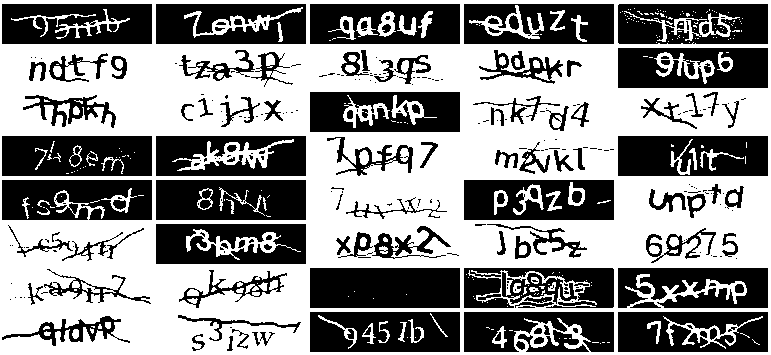

In [7]:
display(Image.fromarray(th1))

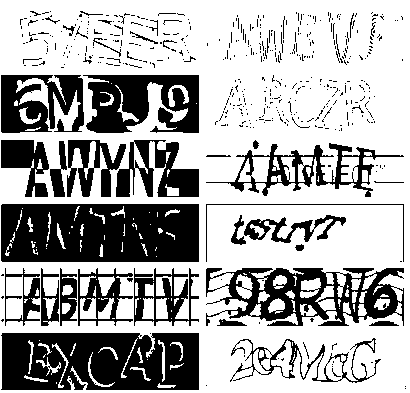

In [8]:
display(Image.fromarray(th2))

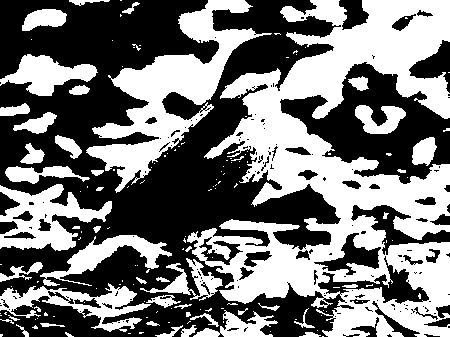

In [9]:
display(Image.fromarray(th3))

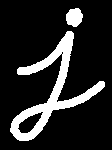

In [10]:
display(Image.fromarray(th4))

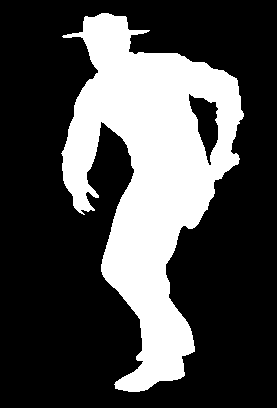

In [11]:
display(Image.fromarray(th5))

In [12]:
size = 3
kernel1 = cv2.getStructuringElement(cv2.MORPH_ELLIPSE,(size,size)) #cv2.MORPH_RECT,(5,5), cv2.MORPH_ELLIPSE,(5,5), cv2.MORPH_CROSS,(5,5)
kernel2 = cv2.getStructuringElement(cv2.MORPH_RECT,(size,size)) #cv2.MORPH_RECT,(5,5), cv2.MORPH_ELLIPSE,(5,5), cv2.MORPH_CROSS,(5,5)
kernel3 = cv2.getStructuringElement(cv2.MORPH_CROSS,(size,size)) #cv2.MORPH_RECT,(5,5), cv2.MORPH_ELLIPSE,(5,5), cv2.MORPH_CROSS,(5,5)

In [13]:
def erosion(g_img, kernel, iters):
    display(Image.fromarray(cv2.erode(g_img,kernel,iterations = iters)))

In [14]:
def dilation(g_img, kernel, iters):
    display(Image.fromarray(cv2.dilate(g_img,kernel,iterations = iters)))

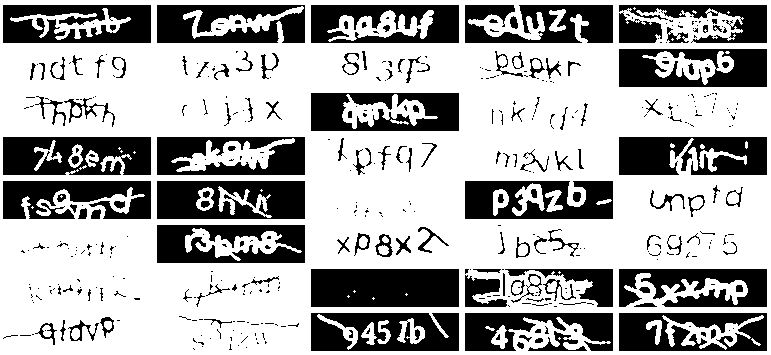

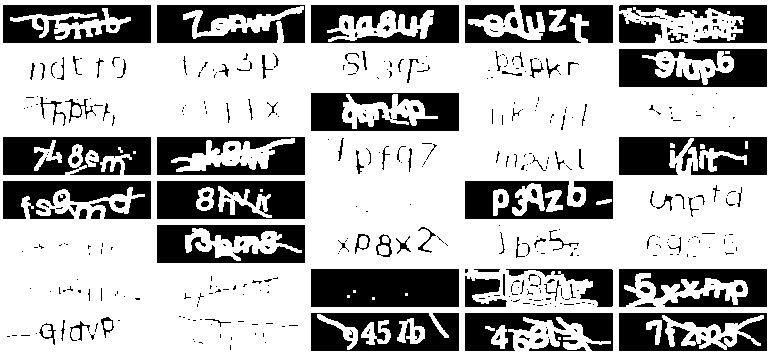

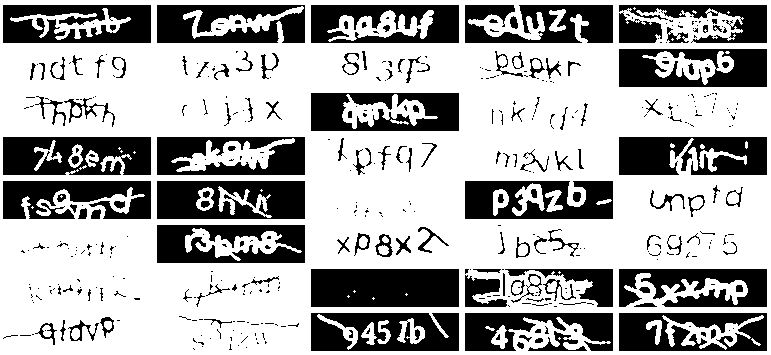

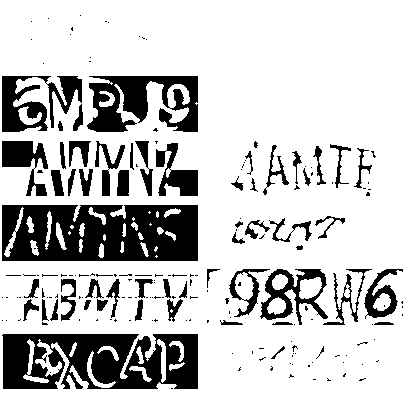

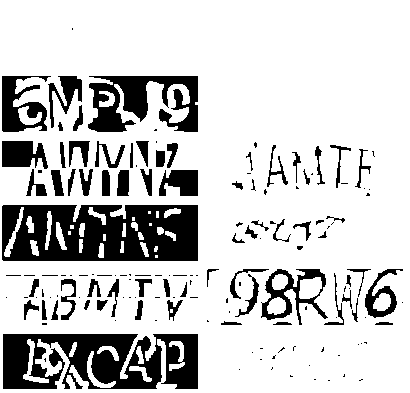

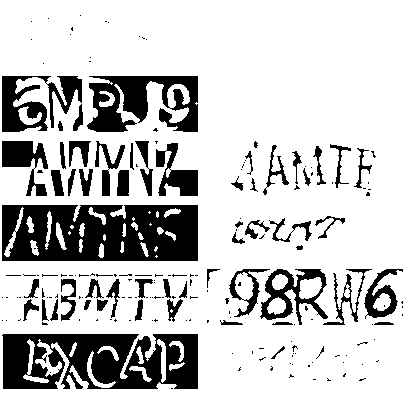

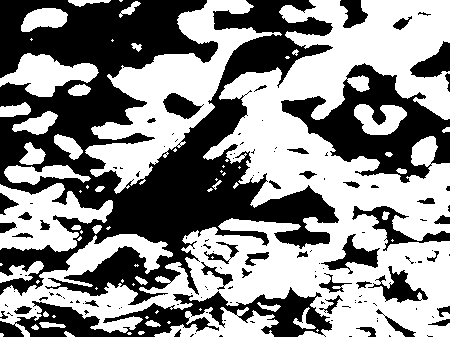

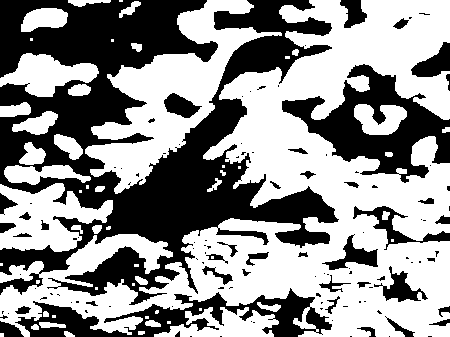

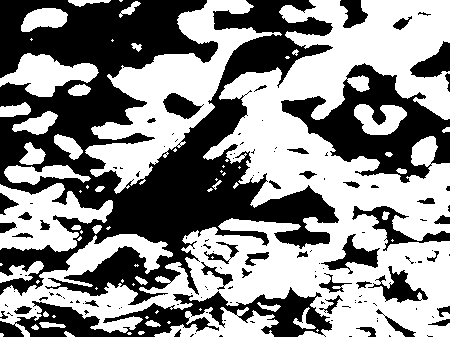

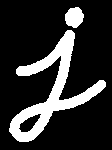

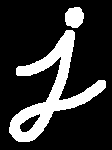

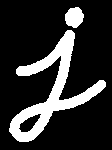

In [15]:
iters = 1
dilation(th1, kernel1, iters)
dilation(th1, kernel2, iters)
dilation(th1, kernel3, iters)
dilation(th2, kernel1, iters)
dilation(th2, kernel2, iters)
dilation(th2, kernel3, iters)
dilation(th3, kernel1, iters)
dilation(th3, kernel2, iters)
dilation(th3, kernel3, iters)
dilation(th4, kernel1, iters)
dilation(th4, kernel2, iters)
dilation(th4, kernel3, iters)

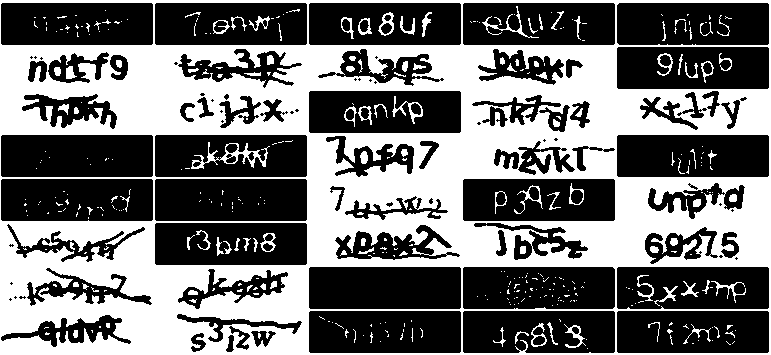

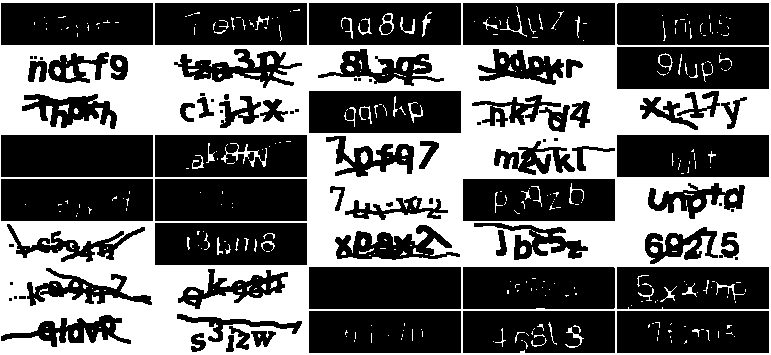

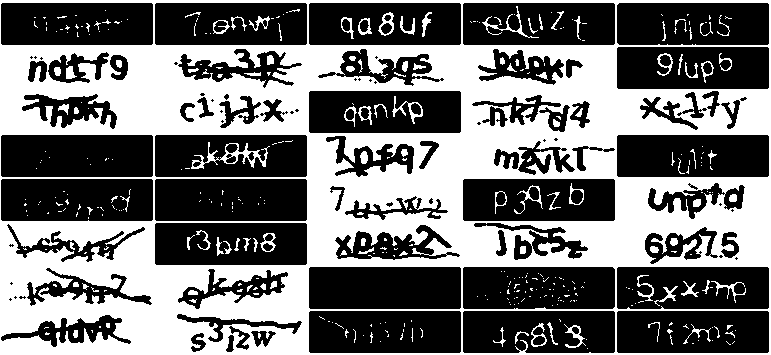

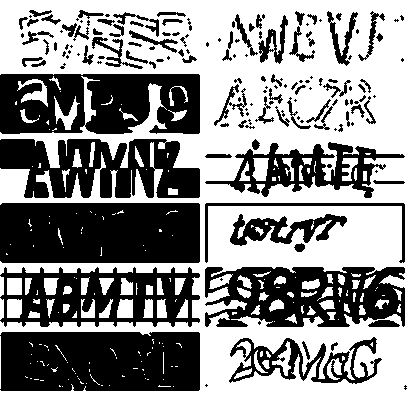

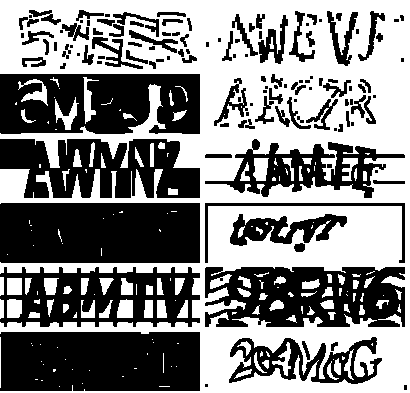

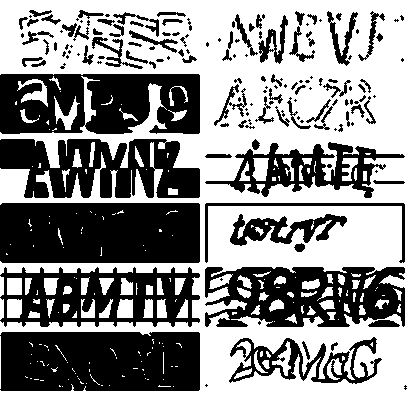

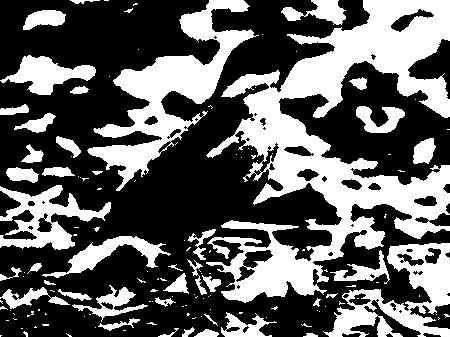

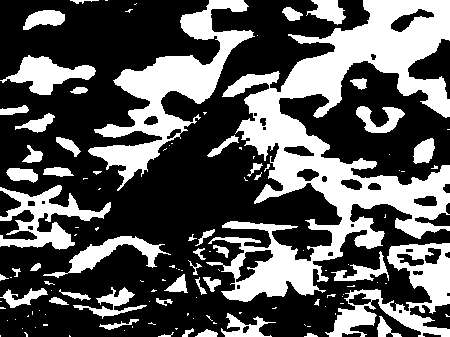

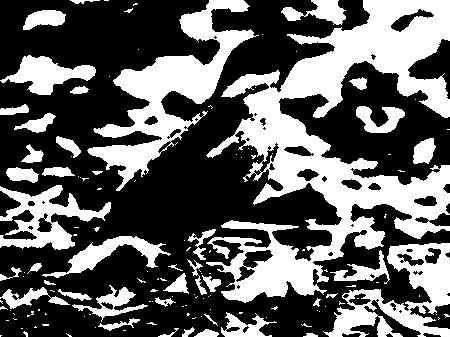

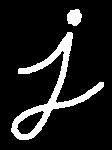

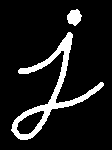

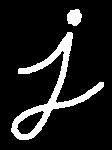

In [16]:
iters = 1
erosion(th1, kernel1, iters)
erosion(th1, kernel2, iters)
erosion(th1, kernel3, iters)
erosion(th2, kernel1, iters)
erosion(th2, kernel2, iters)
erosion(th2, kernel3, iters)
erosion(th3, kernel1, iters)
erosion(th3, kernel2, iters)
erosion(th3, kernel3, iters)
erosion(th4, kernel1, iters)
erosion(th4, kernel2, iters)
erosion(th4, kernel3, iters)

In [17]:
def opening(g_img, kernel, iters):
    display(Image.fromarray(cv2.dilate(cv2.erode(g_img,kernel,iterations=iters), kernel, iters)))

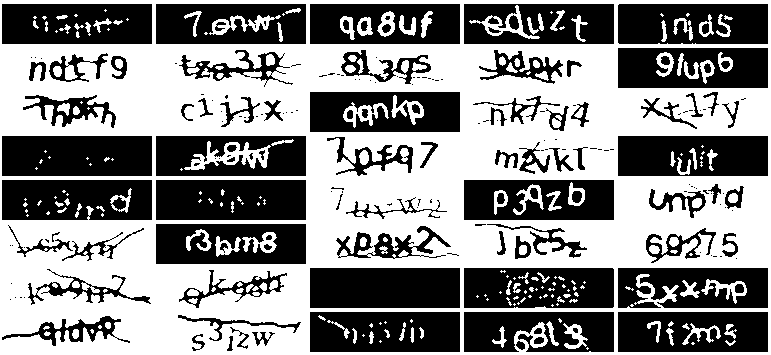

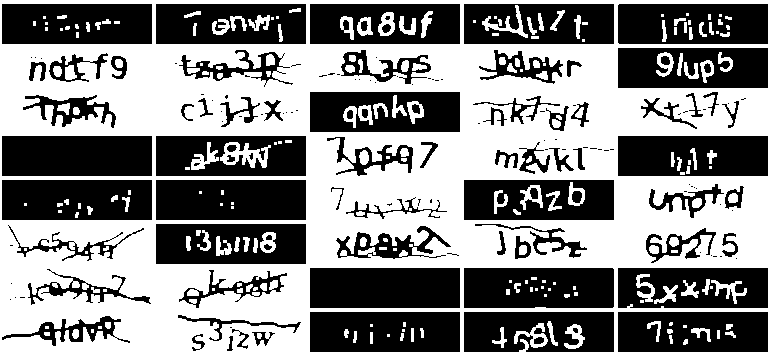

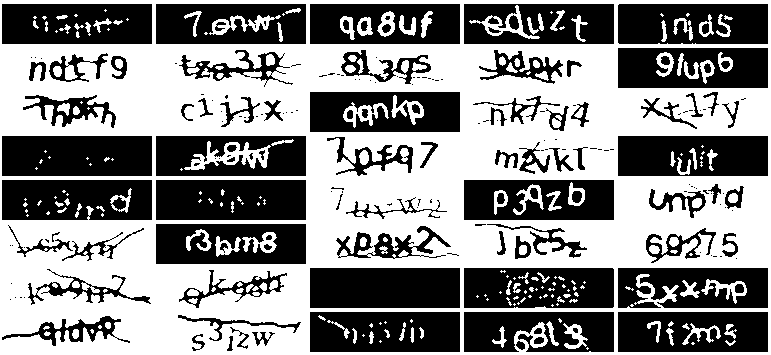

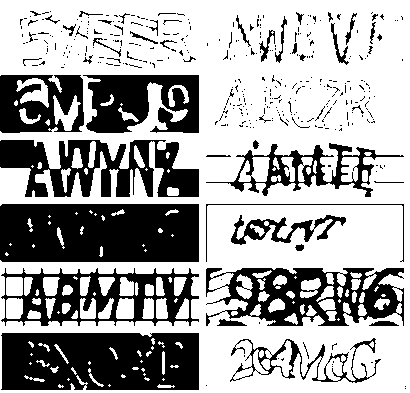

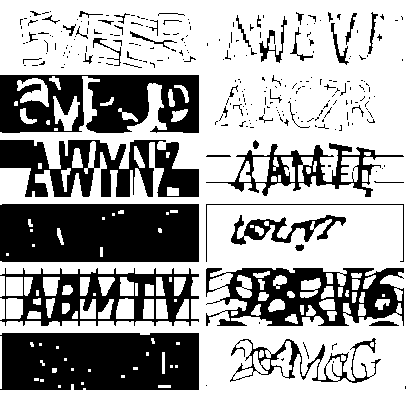

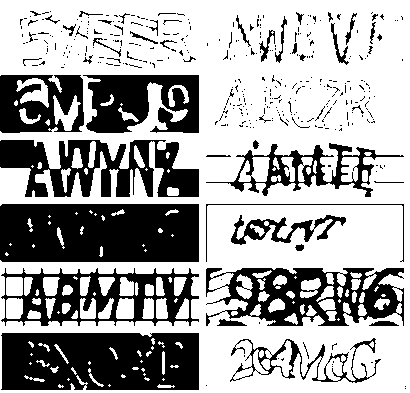

In [18]:
iters = 1
opening(th1, kernel1, iters)
opening(th1, kernel2, iters)
opening(th1, kernel3, iters)
opening(th2, kernel1, iters)
opening(th2, kernel2, iters)
opening(th2, kernel3, iters)

In [19]:
def closing(g_img, kernel, iters):
    display(Image.fromarray(cv2.erode(cv2.dilate(g_img,kernel,iterations=iters), kernel, iters)))

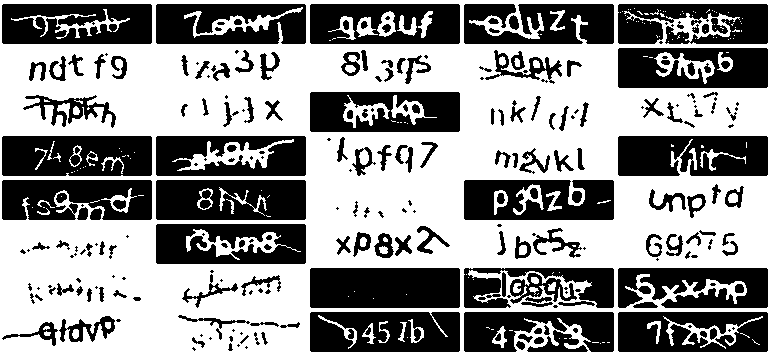

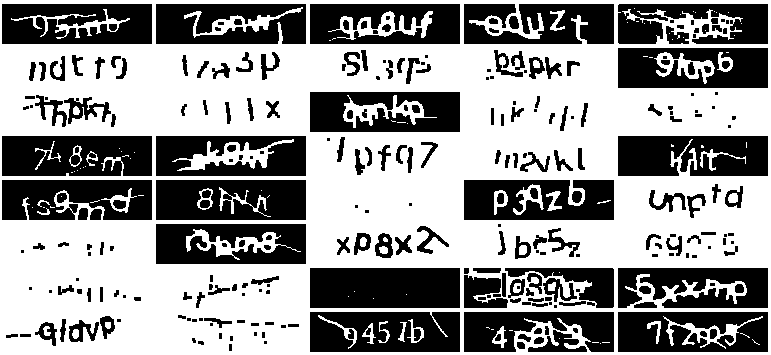

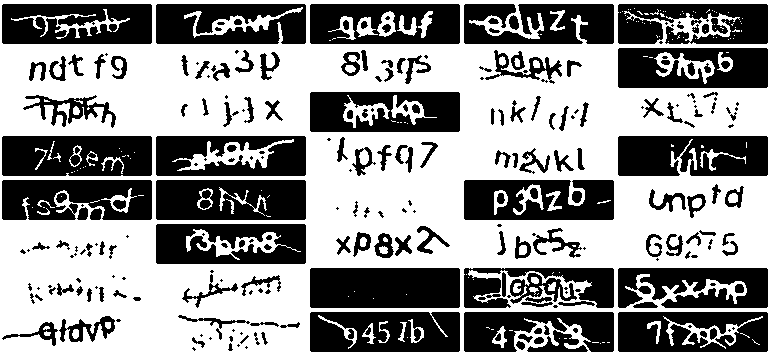

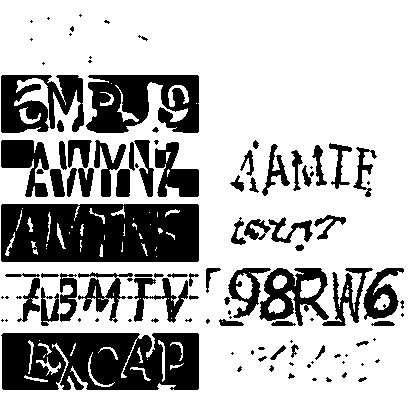

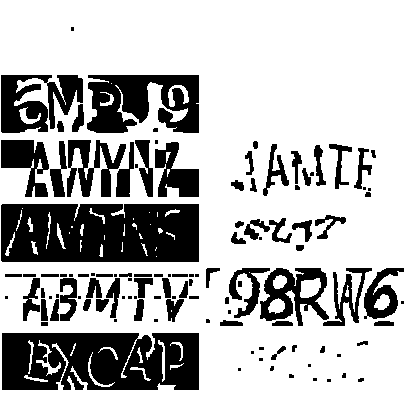

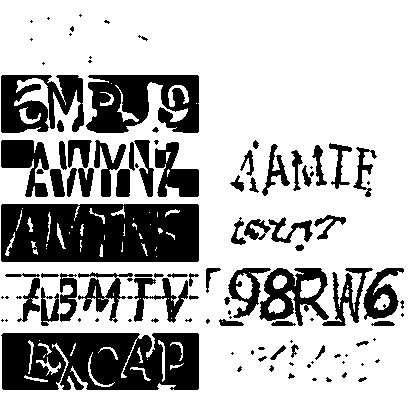

In [20]:
iters = 1
closing(th1, kernel1, iters)
closing(th1, kernel2, iters)
closing(th1, kernel3, iters)
closing(th2, kernel1, iters)
closing(th2, kernel2, iters)
closing(th2, kernel3, iters)


In [21]:
def cond_dilat(g_img, kernel, iters):
    temp_img = cv2.erode(g_img,kernel,iterations=3)
    for i in range(iters):
        previous = temp_img
        temp_img = cv2.dilate(previous,kernel,iterations=1)
        temp_img = np.minimum(g_img, temp_img)
        if np.array_equal(previous, temp_img):
            break
    display(Image.fromarray(temp_img))

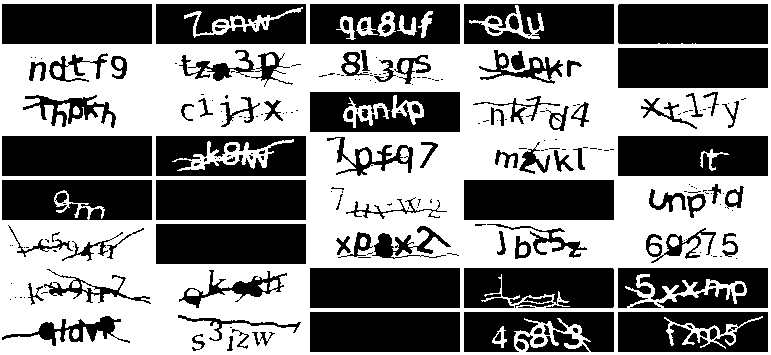

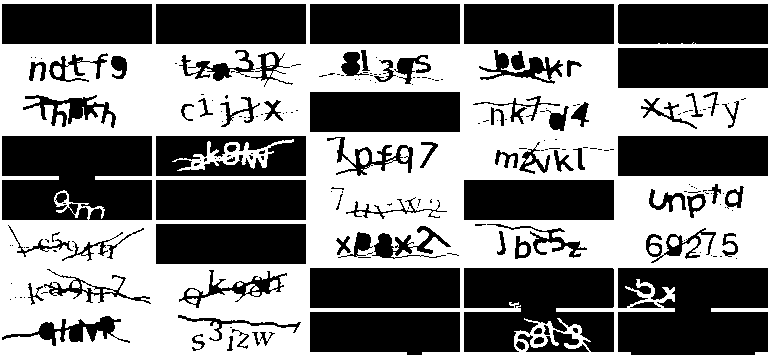

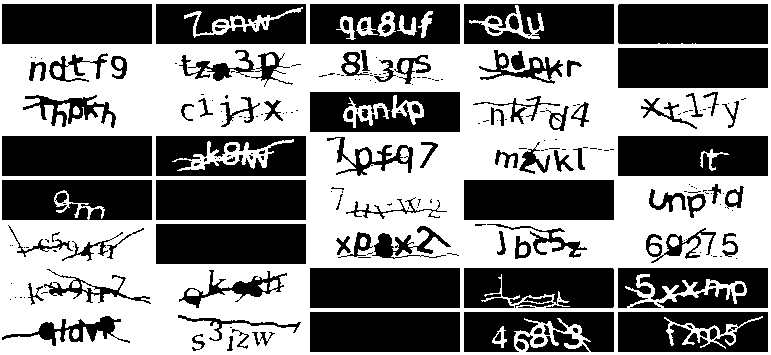

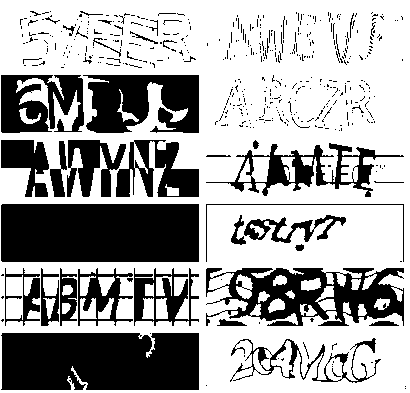

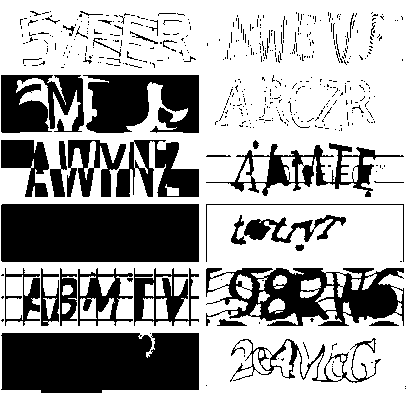

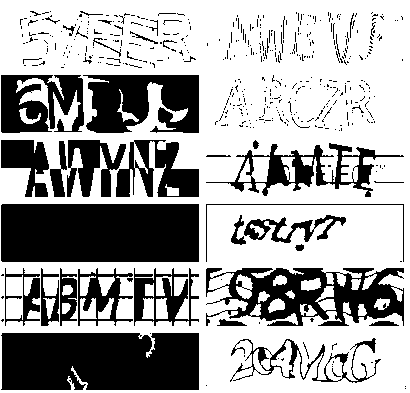

In [22]:
iters = 100
cond_dilat(th1, kernel1, iters)
cond_dilat(th1, kernel2, iters)
cond_dilat(th1, kernel3, iters)
cond_dilat(th2, kernel1, iters)
cond_dilat(th2, kernel2, iters)
cond_dilat(th2, kernel3, iters)

In [23]:
def condition_dilate(img):
    #img = ~img
    elem = cv2.getStructuringElement(cv2.MORPH_RECT, (3, 3))

    minimum = np.minimum(img, cv2.erode(img, elem, iterations=3))
    while True:
        previous = minimum
        minimum = cv2.dilate(minimum, elem)
        result = np.minimum(img, minimum)
        if np.array_equal(result, previous):
            break
        minimum = result
    display(Image.fromarray(result))

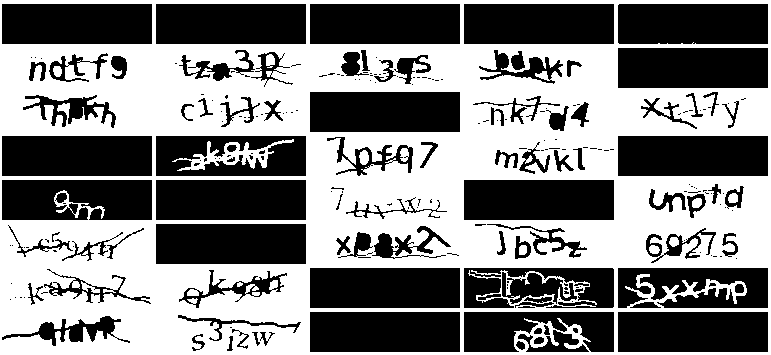

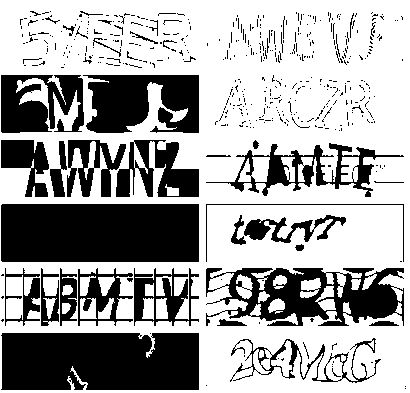

In [24]:
condition_dilate(th1)
condition_dilate(th2)

In [25]:
def skeletoning(img, k_size=(3, 3)):
    skeleton = np.zeros(img.shape, np.uint8)
    kernel = cv2.getStructuringElement(cv2.MORPH_CROSS, ksize=k_size)
    while True:
        erode_img = cv2.erode(img, kernel)
        dilate_img = cv2.dilate(erode_img, kernel)
        subtract = cv2.subtract(img, dilate_img)
        skeleton = cv2.bitwise_or(skeleton, subtract)
        img = erode_img.copy()

        if cv2.countNonZero(img) == 0:
            break
    display(Image.fromarray(skeleton))

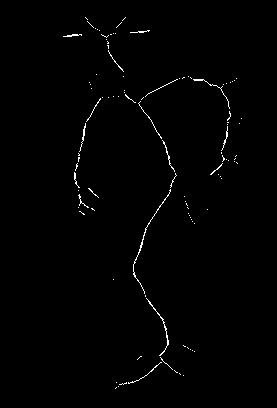

In [26]:
skeletoning(th5)

In [27]:
def get_kernel(option=1, size=3):
    options = {
        "1": lambda size: cv2.getStructuringElement(cv2.MORPH_RECT,(size,size)),
        "2": lambda size: cv2.getStructuringElement(cv2.MORPH_ELLIPSE,(size,size)),
        "3": lambda size: cv2.getStructuringElement(cv2.MORPH_CROSS,(size,size))
    }
    return options[option](size)

In [28]:
get_kernel("3", 3)

array([[0, 1, 0],
       [1, 1, 1],
       [0, 1, 0]], dtype=uint8)

In [29]:
proc_options = {
        "1": lambda x, y, z: dilation(x, y, z),
        "2": lambda x, y, z: erosion(x, y, z),
        "3": lambda x, y, z: opening(x, y, z),
        "4": lambda x, y, z: closing(x, y, z),
        "5": lambda x, y, z: cond_dilat(x, y, z),
        "6": lambda x, y, z: skeletoning(x)
    }

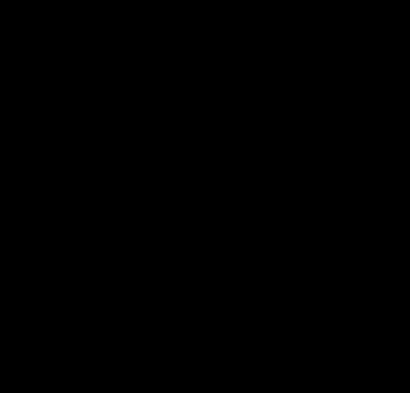

In [30]:
pf = proc_options["3"]
pf(th2, kernel1, iters)

In [69]:
def get_kernel(option=1, size=3):
    options = {
        "1": lambda size: cv2.getStructuringElement(cv2.MORPH_RECT,(size,size)),
        "2": lambda size: cv2.getStructuringElement(cv2.MORPH_ELLIPSE,(size,size)),
        "3": lambda size: cv2.getStructuringElement(cv2.MORPH_CROSS,(size,size))
    }
    return options[option](size)

def cond_dilat(bin_image, kernel1, kernel2):
    bin_image = ~bin_image
    minimum = np.minimum(bin_image, cv2.erode(bin_image, kernel1, iterations=3))
    while True:
        previous = minimum
        minimum = cv2.dilate(minimum, kernel2, iterations=1)
        result = np.minimum(bin_image, minimum)
        if np.array_equal(result, previous):
            print(">>> Condition dilatation ended")
            return ~result
        minimum = result
    return ~result

In [77]:
#fight image th2
k1_0 = get_kernel("3", 3) #cross 3
k2_0 = get_kernel("1", 3) #rect

k1_1 = get_kernel("2", 3) #elps 3
k2_1 = get_kernel("1", 3) #rect

k1_2 = get_kernel("3", 5) #cross 5
k2_2 = get_kernel("1", 3) #rect

k1_3 = get_kernel("2", 5) #elps 5
k2_3 = get_kernel("1", 3) #rect

k1_4 = get_kernel("3", 7) #cross 7
k2_4 = get_kernel("1", 3) #rect

k1_5 = get_kernel("2", 7) #elps 7
k2_5 = get_kernel("1", 3) #rect

k1_6 = get_kernel("3", 11) #cross 11
k2_6 = get_kernel("1", 3) #rect

k1_7 = get_kernel("2", 11) #elps 11
k2_7 = get_kernel("1", 3) #rect

res_img0 = cond_dilat(th2, k1_0, k2_0)
res_img1 = cond_dilat(th2, k1_1, k2_1)
res_img2 = cond_dilat(th2, k1_2, k2_2)
res_img3 = cond_dilat(th2, k1_3, k2_3)
res_img4 = cond_dilat(th2, k1_4, k2_4)
res_img5 = cond_dilat(th2, k1_5, k2_5)
res_img6 = cond_dilat(th2, k1_6, k2_6)
res_img7 = cond_dilat(th2, k1_7, k2_7)

>>> Condition dilatation ended
>>> Condition dilatation ended
>>> Condition dilatation ended
>>> Condition dilatation ended
>>> Condition dilatation ended
>>> Condition dilatation ended
>>> Condition dilatation ended
>>> Condition dilatation ended


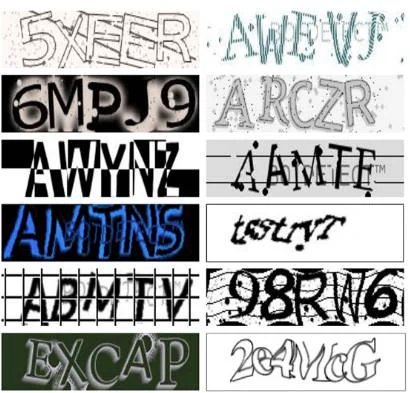

cross 3, rect 3:


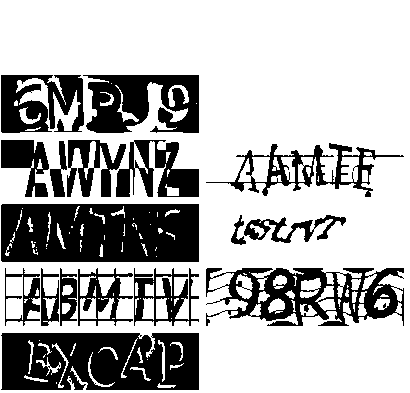

elps 3, rect 3:


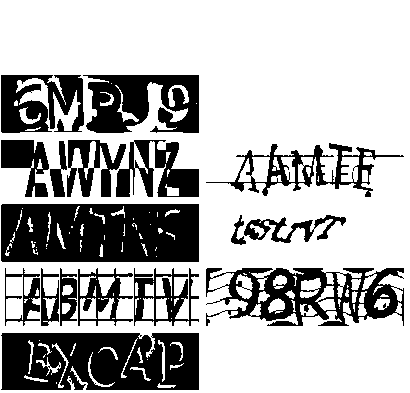

cross 5, rect 3:


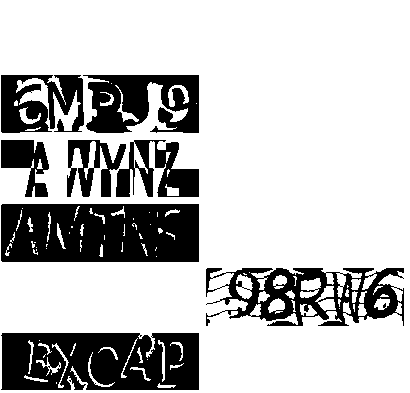

elps 5, rect 3:


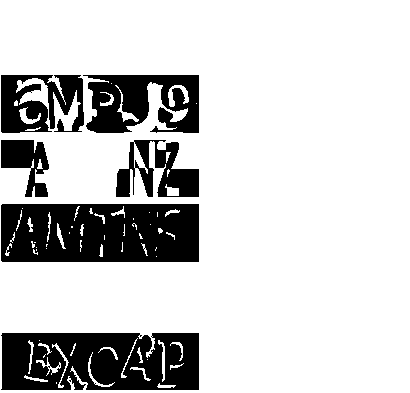

cross 7, rect 3:


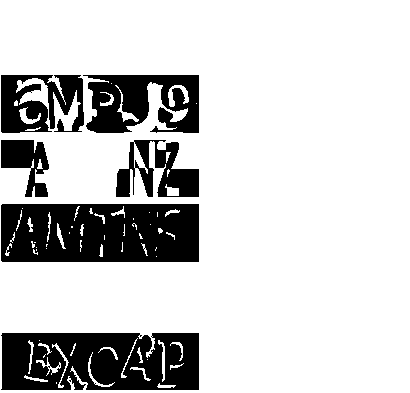

elps 7, rect 3:


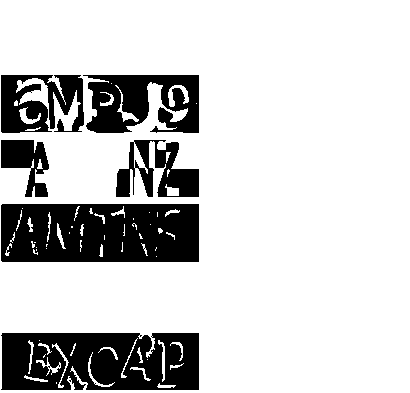

cross 11, rect 3:


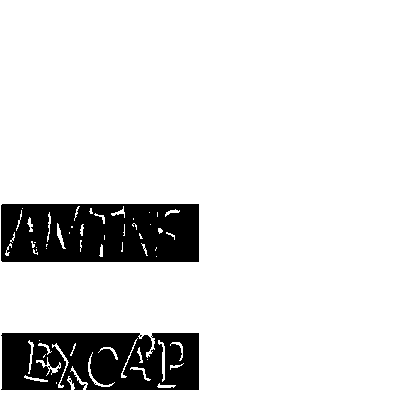

elps 11, rect 3:


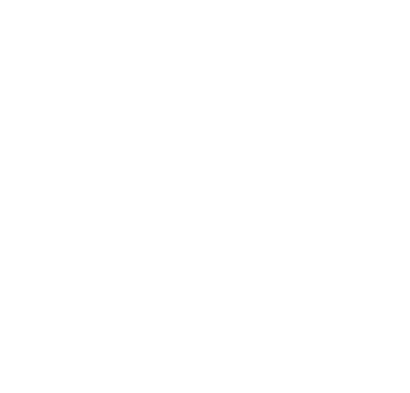

In [78]:
display(Image.fromarray(cv2.imread(IMG_DEFAULT2)))
print("cross 3, rect 3:")
display(Image.fromarray(res_img0))
print("elps 3, rect 3:")
display(Image.fromarray(res_img1))
print("cross 5, rect 3:")
display(Image.fromarray(res_img2))
print("elps 5, rect 3:")
display(Image.fromarray(res_img3))
print("cross 7, rect 3:")
display(Image.fromarray(res_img4))
print("elps 7, rect 3:")
display(Image.fromarray(res_img4))
print("cross 11, rect 3:")
display(Image.fromarray(res_img6))
print("elps 11, rect 3:")
display(Image.fromarray(res_img7))